## Starcraft II Analysis ( Data visualization)


### Data analysis based on 
In-Depth Look at Starcraft II Replays

Starcraft 2 Replay data by : Joe Thmpson, Mark Blair, Andrew Henry, Bill Chen 

Starcraft 2 visualization : Gema Parreño 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.tools.plotting import scatter_matrix
import seaborn as sns
from sklearn.cluster import KMeans 
from sklearn.preprocessing import MinMaxScaler
from mpl_toolkits.mplot3d import Axes3D
from operator import itemgetter
from scipy.cluster.hierarchy import dendrogram, linkage
import squarify 

In [2]:
dataset = pd.read_csv('data/starcraft.csv')

In [3]:
dataset.head()

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,...,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilityUsed,MaxTimeStamp
0,52,5,27.0,10.0,3000.0,143.7180,0.003515,0.000220,0.000055,0.000110,...,0.004849,32.6677,40.8673,4.7508,0.000220,0.001397,0.000047,0.0,0.000000,127448
1,55,5,23.0,10.0,5000.0,129.2322,0.003304,0.000259,0.000069,0.000294,...,0.004307,32.9194,42.3454,4.8434,0.000381,0.001194,0.000087,0.0,0.000208,57812
2,56,4,30.0,10.0,200.0,69.9612,0.001101,0.000336,0.000042,0.000294,...,0.002926,44.6475,75.3548,4.0430,0.000231,0.000745,0.000063,0.0,0.000189,95360
3,57,3,19.0,20.0,400.0,107.6016,0.001034,0.000213,0.000011,0.000053,...,0.003783,29.2203,53.7352,4.9155,0.000202,0.000426,0.000075,0.0,0.000384,93852
4,58,3,32.0,10.0,500.0,122.8908,0.001136,0.000327,0.000039,0.000000,...,0.002368,22.6885,62.0813,9.3740,0.000289,0.001174,0.000077,0.0,0.000019,51936


In [4]:
len(dataset)

3395

In [5]:
description = dataset.describe()

In [6]:
description

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,...,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilityUsed,MaxTimeStamp
count,3395.000000,3395.000000,3340.000000,3339.000000,3338.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,...,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000
mean,4805.012371,4.184094,21.647904,15.910752,960.421809,117.046947,0.004299,0.000374,0.000059,0.000098,...,0.003463,40.361562,63.739403,5.272988,0.000283,0.001032,0.000085,0.000059,0.000142,83598.229161
std,2719.944851,1.517327,4.206341,11.962912,17318.133922,51.945291,0.005284,0.000225,0.000038,0.000166,...,0.000992,17.153570,19.238869,1.494835,0.000087,0.000519,0.000025,0.000111,0.000265,33497.667966
min,52.000000,1.000000,16.000000,0.000000,3.000000,22.059600,0.000000,0.000000,0.000000,0.000000,...,0.000679,6.666700,24.093600,2.038900,0.000091,0.000077,0.000020,0.000000,0.000000,25224.000000
25%,2464.500000,3.000000,19.000000,8.000000,300.000000,79.900200,0.001258,0.000204,0.000033,0.000000,...,0.002754,28.957750,50.446600,4.272850,0.000224,0.000683,0.000068,0.000000,0.000000,60090.000000
50%,4874.000000,4.000000,21.000000,12.000000,500.000000,108.010200,0.002500,0.000353,0.000053,0.000040,...,0.003395,36.723500,60.931800,5.095500,0.000270,0.000905,0.000082,0.000000,0.000020,81012.000000
75%,7108.500000,5.000000,24.000000,20.000000,800.000000,142.790400,0.005133,0.000499,0.000079,0.000119,...,0.004027,48.290500,73.681300,6.033600,0.000325,0.001259,0.000099,0.000086,0.000181,102074.000000
max,10095.000000,8.000000,44.000000,168.000000,1000000.000000,389.831400,0.043088,0.001752,0.000338,0.003019,...,0.007971,237.142900,176.372100,18.558100,0.000832,0.005149,0.000202,0.000902,0.003084,388032.000000


### Discovering structure in  dendograms and heatmap data

The dendograms or tree diagram illustrate the hierarchical organization of entities

Heatmaps cluster rows and columns of a data matrix and finds clusters visually identifying rectangular areas of the same color. That suggests a group of rows that is correlated for the corresponding group of columns. 

The method here is key for the clusterization
https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html

The method assigns the relationship in between the obsevation and the objects in the cluster 
single -- minimum distance (Nearest Point Algorithm)
complete -- max distance (Farthest point Algorithm)
average -- (UPGMA Algorithmn)
weighted -- WPGMA Algortihmn
centroid -- UPGMC Algo
ward

In [7]:
dataset.dropna()

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,...,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilityUsed,MaxTimeStamp
0,52,5,27.0,10.0,3000.0,143.7180,0.003515,0.000220,0.000055,0.000110,...,0.004849,32.6677,40.8673,4.7508,0.000220,0.001397,0.000047,0.000000,0.000000,127448
1,55,5,23.0,10.0,5000.0,129.2322,0.003304,0.000259,0.000069,0.000294,...,0.004307,32.9194,42.3454,4.8434,0.000381,0.001194,0.000087,0.000000,0.000208,57812
2,56,4,30.0,10.0,200.0,69.9612,0.001101,0.000336,0.000042,0.000294,...,0.002926,44.6475,75.3548,4.0430,0.000231,0.000745,0.000063,0.000000,0.000189,95360
3,57,3,19.0,20.0,400.0,107.6016,0.001034,0.000213,0.000011,0.000053,...,0.003783,29.2203,53.7352,4.9155,0.000202,0.000426,0.000075,0.000000,0.000384,93852
4,58,3,32.0,10.0,500.0,122.8908,0.001136,0.000327,0.000039,0.000000,...,0.002368,22.6885,62.0813,9.3740,0.000289,0.001174,0.000077,0.000000,0.000019,51936
5,60,2,27.0,6.0,70.0,44.4570,0.000978,0.000255,0.000021,0.000000,...,0.002425,76.4405,98.7719,3.0965,0.000170,0.000372,0.000064,0.000000,0.000000,94032
6,61,1,21.0,8.0,240.0,46.9962,0.000820,0.000169,0.000067,0.000000,...,0.001988,94.0227,90.5311,4.1017,0.000169,0.000573,0.000056,0.000000,0.000000,89012
7,72,7,17.0,42.0,10000.0,212.6022,0.009040,0.000676,0.000060,0.001164,...,0.004952,24.6117,41.7671,6.6104,0.000448,0.002277,0.000090,0.000129,0.000249,100556
8,77,4,20.0,14.0,2708.0,117.4884,0.002944,0.000527,0.000019,0.000019,...,0.005399,52.0140,46.4321,3.3746,0.000273,0.001035,0.000066,0.000273,0.000470,106308
9,81,4,18.0,24.0,800.0,155.9856,0.005054,0.000524,0.000100,0.000025,...,0.003569,24.4632,52.1538,6.5664,0.000337,0.001310,0.000075,0.000000,0.000000,80136


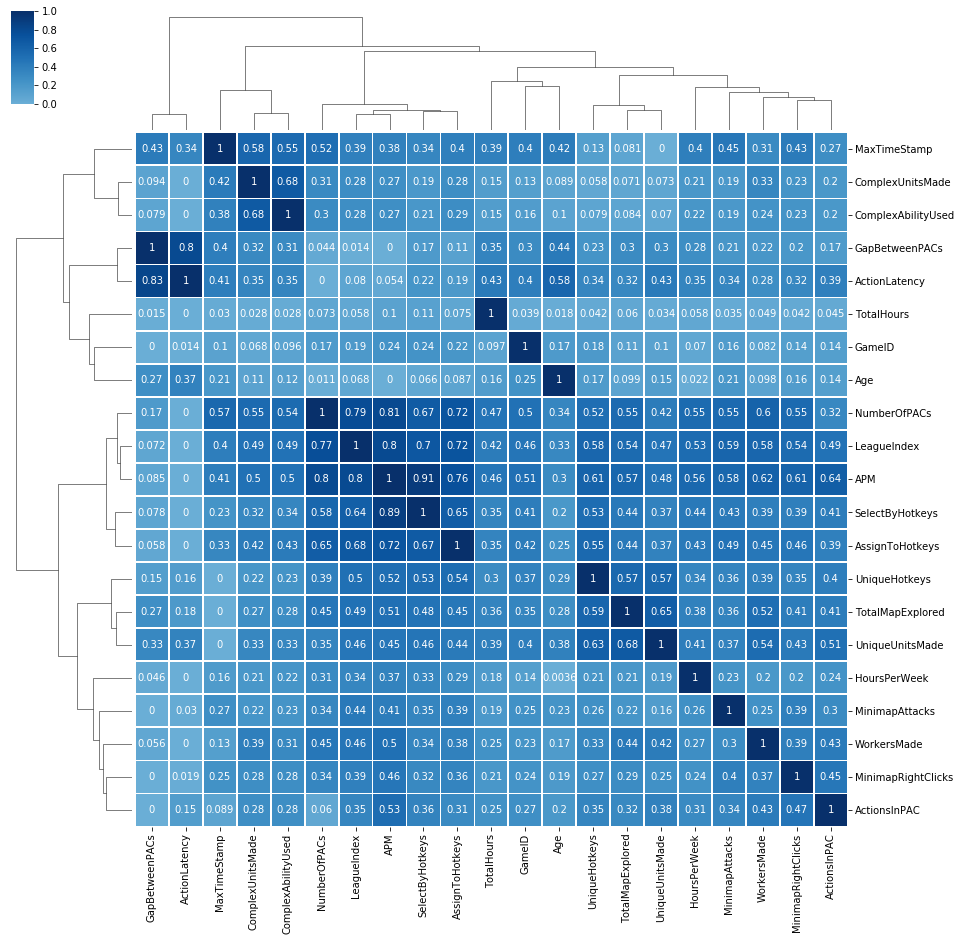

In [8]:
# rows  clustered 
sns.clustermap(dataset.corr(), method="ward" ,center=0, cmap="Blues", col_cluster=True,
                annot=True,
               linewidths=.75, figsize=(15, 15), standard_scale=0)

### Only dendogram 


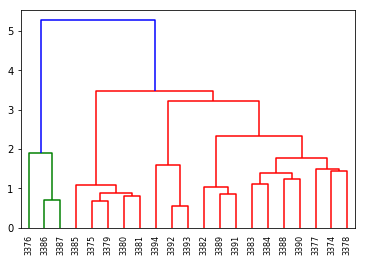

In [9]:
Z = linkage(dataset.corr(), 'ward')
dendrogram(Z, leaf_rotation=90, leaf_font_size=8, labels=dataset.index)
plt.axhline(y=240, c='grey', lw=1, linestyle='dashed')

### Correlation Matrix
Measures the correlation coefficients between sets of variables 
Allow us to see wich pairs have more correlation

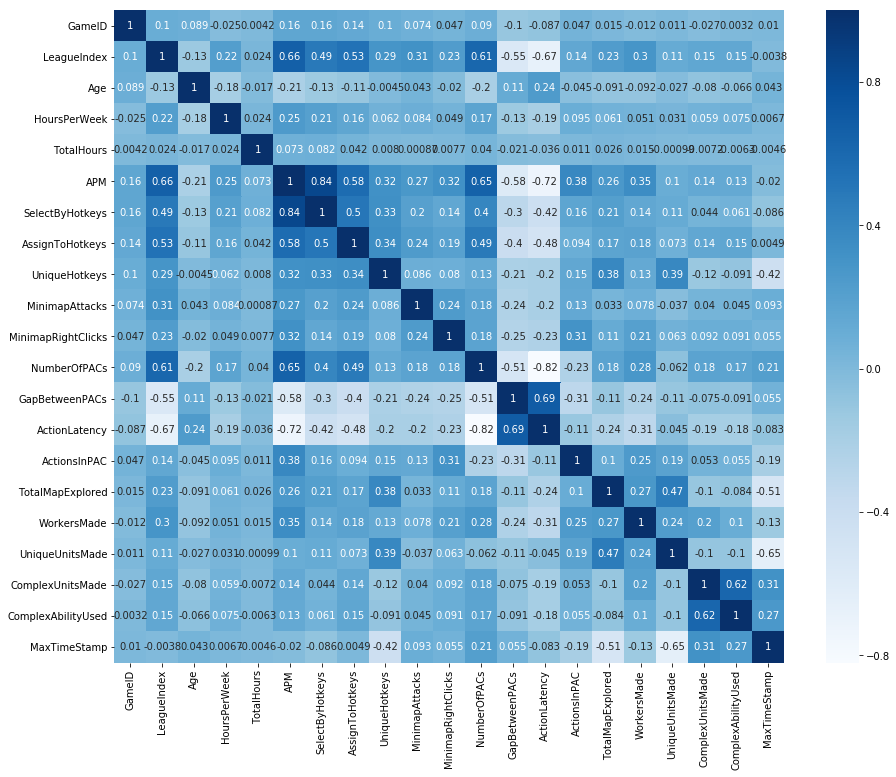

In [10]:
fig, ax = plt.subplots(figsize=(15,12))

corr = dataset.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, ax=ax, annot=True, cmap="Blues")

### Custom correlogram 

In [11]:
#Convert all columns to int 
correlogram_dataset = dataset[['LeagueIndex', 'Age', 'HoursPerWeek', \
                              'TotalHours', 'APM', 'SelectByHotkeys', 'AssignToHotkeys', \
                              'UniqueHotkeys', 'MinimapAttacks']]

def type_and_convert(dataset):
    return dataset[dataset.columns].astype(np.float64).dropna()


In [12]:
type_and_convert(correlogram_dataset)

,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks
0,5.0,27.0,10.0,3000.0,143.7180,0.003515,0.000220,0.000055,0.000110
1,5.0,23.0,10.0,5000.0,129.2322,0.003304,0.000259,0.000069,0.000294
2,4.0,30.0,10.0,200.0,69.9612,0.001101,0.000336,0.000042,0.000294
3,3.0,19.0,20.0,400.0,107.6016,0.001034,0.000213,0.000011,0.000053
4,3.0,32.0,10.0,500.0,122.8908,0.001136,0.000327,0.000039,0.000000
5,2.0,27.0,6.0,70.0,44.4570,0.000978,0.000255,0.000021,0.000000
6,1.0,21.0,8.0,240.0,46.9962,0.000820,0.000169,0.000067,0.000000
7,7.0,17.0,42.0,10000.0,212.6022,0.009040,0.000676,0.000060,0.001164
8,4.0,20.0,14.0,2708.0,117.4884,0.002944,0.000527,0.000019,0.000019
9,4.0,18.0,24.0,800.0,155.9856,0.005054,0.000524,0.000100,0.000025


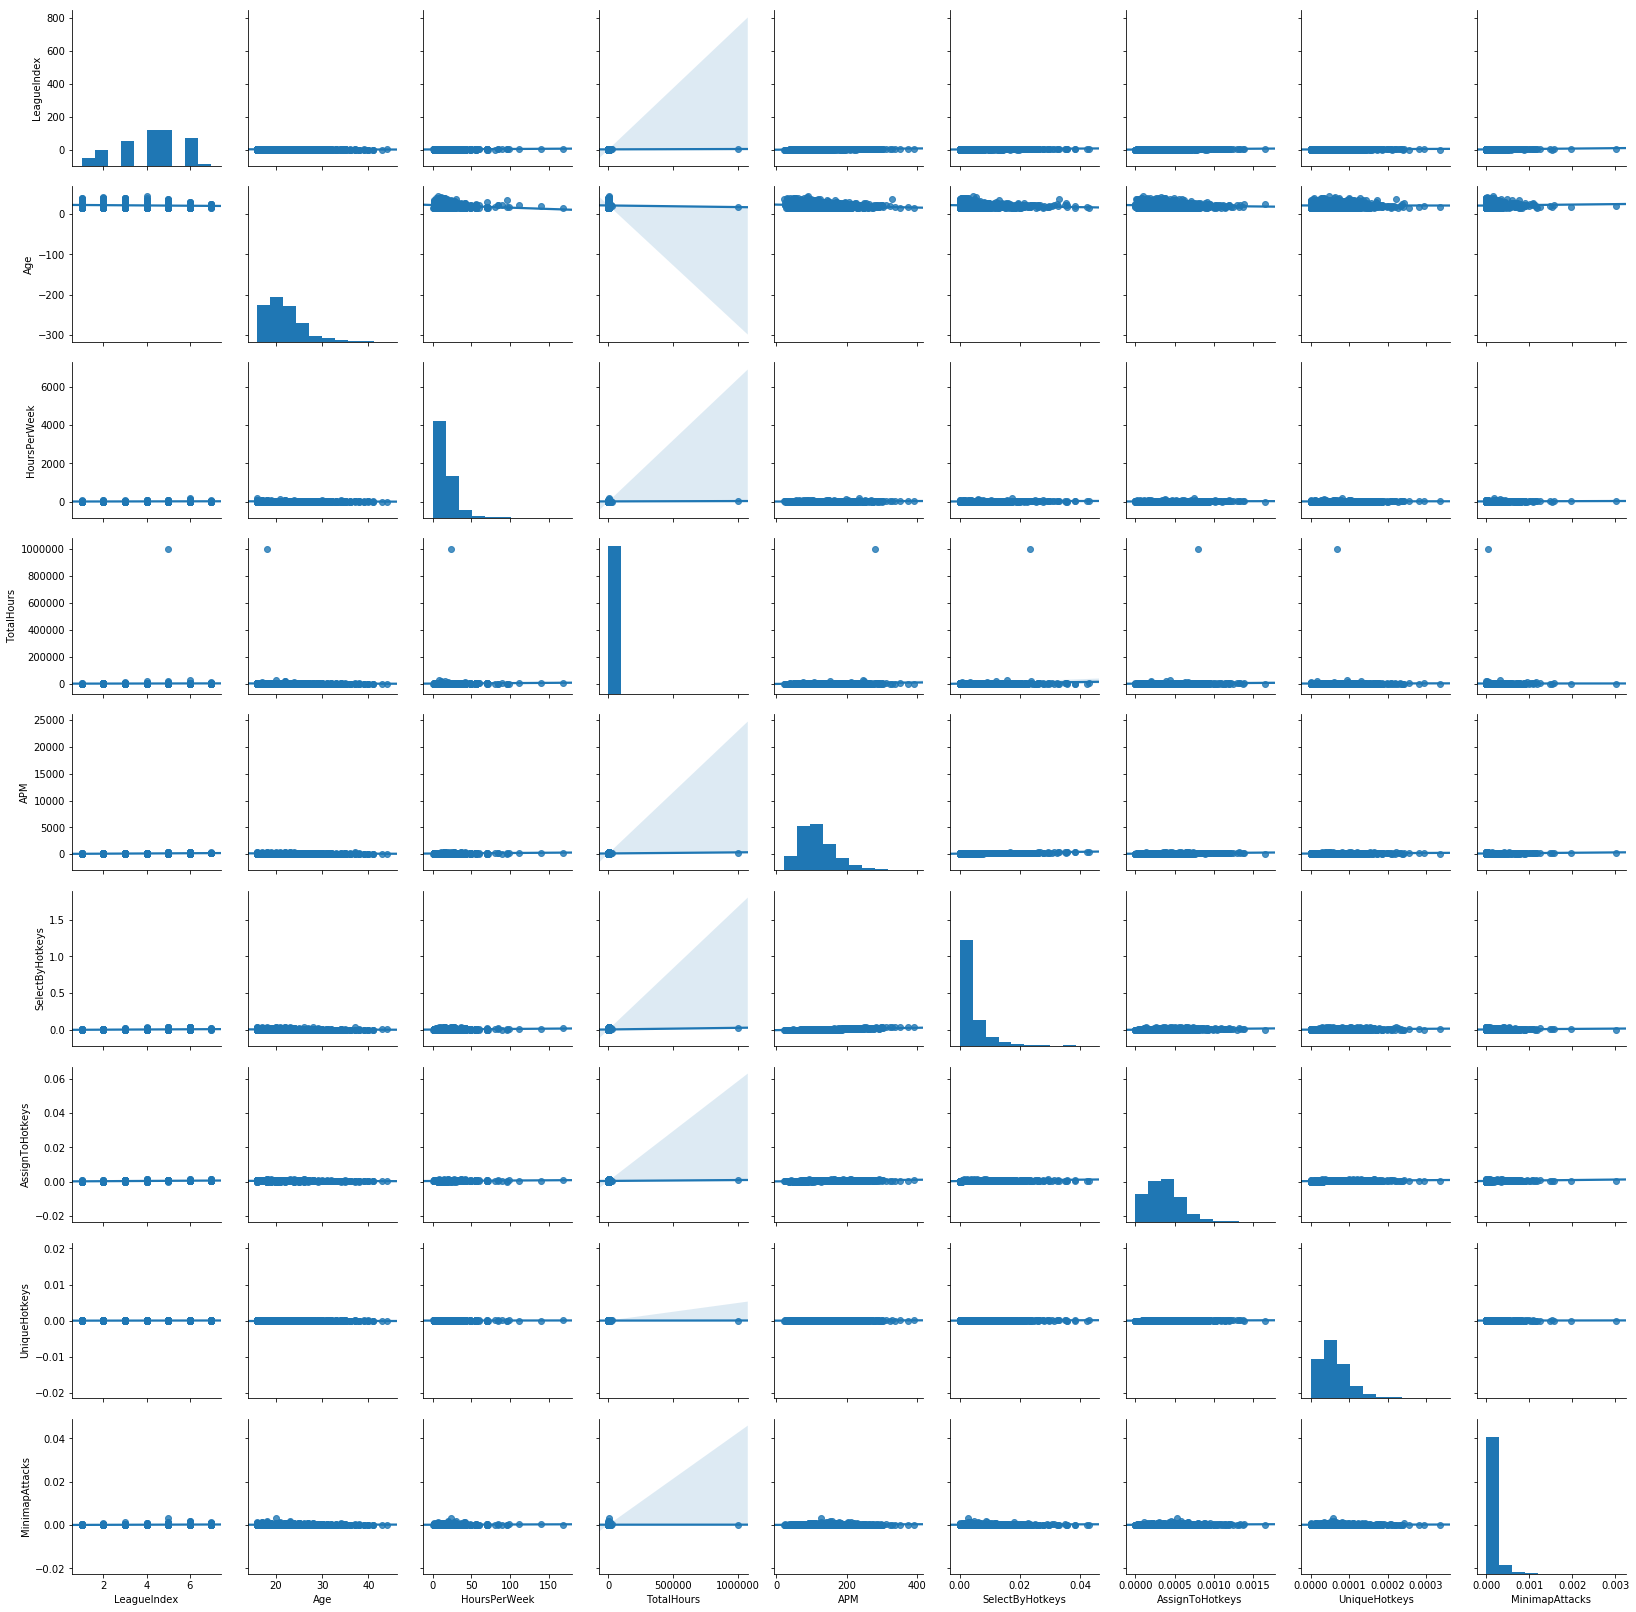

In [13]:
## Select ceratin columns 'LeagueIndex','Age','HoursPerWeek','TotalHours', 'APM', 'SelectByHotkeys' ,
#The selected columns come from PCA result analysis 

sns.pairplot(correlogram_dataset.dropna(), kind="reg")

##Distribution of players per ligue 

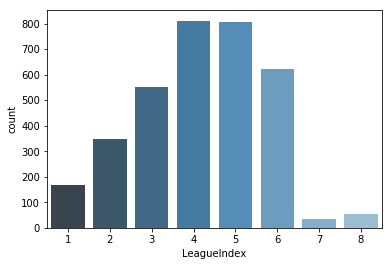

In [14]:
dataset['LeagueIndex'].value_counts()
sns.countplot(x='LeagueIndex', data=dataset, palette="Blues_d")

### Radar Chart per League 

In [15]:
import matplotlib.pyplot as plt
import matplotlib
import squarify 

### TreeMap

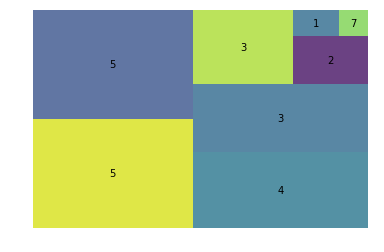

In [16]:
squarify.plot(sizes=dataset['LeagueIndex'].value_counts(), label=dataset['LeagueIndex'], alpha=.8  )
plt.axis('off')
plt.show()

### Radar Chart per League 

In [17]:
def create_masks(dataset):
    league_list = []
    interval = np.arange(0,9, 1)
    # Creates the mask 
    for i in interval:
        mask_i = (dataset['LeagueIndex'] >= interval[i]) & (dataset['LeagueIndex'] <= interval[i] + 1)
        Level_i = dataset.loc[mask_i]
        league_list.append(Level_i)
    return league_list
    

In [19]:
### LEAGUE 1 
data_league = create_masks(dataset)
League_1_radar = data_league[0].mean().as_matrix()
League_1_radar

array([4.42735928e+03, 1.00000000e+00, 2.27245509e+01, 1.31257485e+01,
       2.64191617e+02, 5.95392765e+01, 1.08114603e-03, 1.85471425e-04,
       4.52677605e-05, 2.82793174e-05, 2.08167395e-04, 2.36328384e-03,
       6.56549874e+01, 9.54049766e+01, 4.54828683e+00, 2.50519102e-04,
       6.26455569e-04, 7.85706467e-05, 1.46590719e-05, 4.17485030e-05,
       8.05585868e+04])

In [20]:
labels = np.array(['Age','HoursPerWeek','SelectByHotkeys','AssignToHotkeys','MinimapAttacks','ActionLatency',
                   'TotalMapExplored', 'WorkersMade','ComplexUnitsMade','ComplexAbilityUsed'])
# We use example ## Create an array that is the median value of the dataset 
stats = itemgetter(2,3,4,6,7,8,13,15,18,19)(League_1_radar)
len(labels)

10

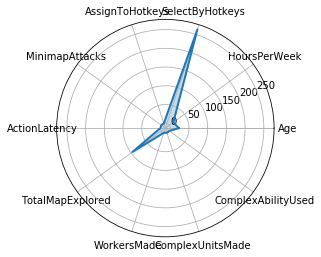

In [21]:
angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)
# close the plot
stats=np.concatenate((stats,[stats[0]]))
angles=np.concatenate((angles,[angles[0]]))
fig=plt.figure()
ax = fig.add_subplot(111, polar=True)
ax.plot(angles, stats, linewidth=2)
ax.fill(angles, stats, alpha=0.25)
ax.set_thetagrids(angles * 180/np.pi, labels)
ax.set_title("LeagueIndex_1")
ax.set_title("")
ax.grid(True)

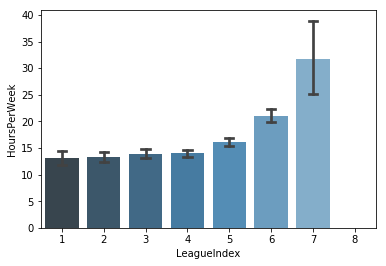

In [22]:
HoursWeek_per_League = sns.barplot(x='LeagueIndex', y='HoursPerWeek', data=dataset, capsize=.2, palette="Blues_d")

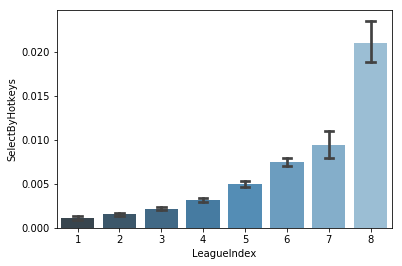

In [23]:
HoursWeek_per_League = sns.barplot(x='LeagueIndex', y='SelectByHotkeys', data=dataset, capsize=.2, palette="Blues_d")

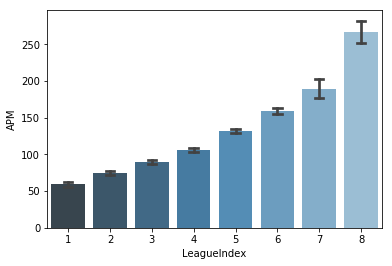

In [24]:
APM_per_League = sns.barplot(x='LeagueIndex', y='APM', data=dataset, capsize=.2, palette="Blues_d")
#The APM increase as the league increases 

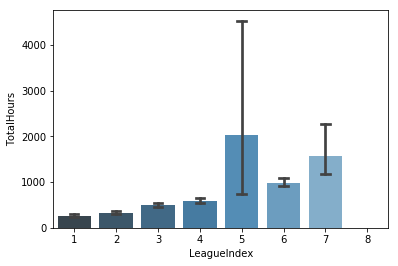

In [25]:
Total_per_League = sns.barplot(x='LeagueIndex', y='TotalHours', data=dataset, capsize=.2, palette="Blues_d")

In [26]:
#ax = sns.barplot(x='LeagueIndex', y='Age', data=dataset, capsize=.2, palette="Blues_d")
dataset['Age'].mean()

21.647904191616767

### Density Plots

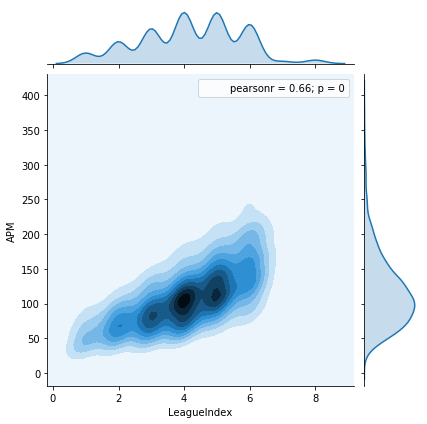

In [27]:
#Measures the concentration of 
# We must take into account that most of our players come from league 4 
sns.jointplot(dataset.LeagueIndex, dataset.APM, kind='kde')

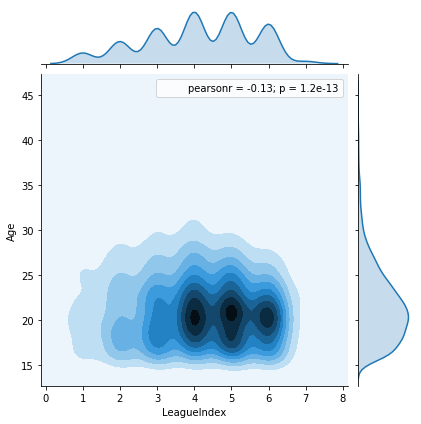

In [28]:
sns.jointplot(dataset.LeagueIndex, dataset.Age, kind='kde')

### Plot two shaded bivariate densities

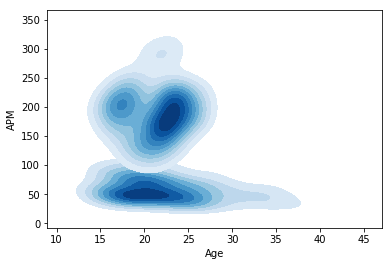

In [29]:
Level_1 = dataset.loc[dataset['LeagueIndex'] == 1]
Level_7 = dataset.loc[dataset['LeagueIndex'] == 7]
ax = sns.kdeplot(Level_1.Age, Level_1.APM,
                 cmap="Blues", shade=True, shade_lowest=False)
ax = sns.kdeplot(Level_7.Age, Level_7.APM,
                 cmap="Blues", shade=True, shade_lowest=False)

In [30]:
# Specify interval
#interval = np.arange(0, 9, 1)
#interval
#plt.hist(dataset['LeagueIndex'], bins=interval, align='left', color='red')

In [31]:
#Create a dataset for every level 
mask_1 = (dataset['LeagueIndex'] >= 0) & (dataset['LeagueIndex'] <= 1)
Level_1 = dataset.loc[mask_1]

#Also
Level_1_1 = dataset.loc[dataset['LeagueIndex'] == 1]
league_1_array = Level_1_1.mean()
league_1_array.as_matrix()

array([4.42735928e+03, 1.00000000e+00, 2.27245509e+01, 1.31257485e+01,
       2.64191617e+02, 5.95392765e+01, 1.08114603e-03, 1.85471425e-04,
       4.52677605e-05, 2.82793174e-05, 2.08167395e-04, 2.36328384e-03,
       6.56549874e+01, 9.54049766e+01, 4.54828683e+00, 2.50519102e-04,
       6.26455569e-04, 7.85706467e-05, 1.46590719e-05, 4.17485030e-05,
       8.05585868e+04])

In [32]:
### Study per level 
Level_1_1.head()

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,...,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilityUsed,MaxTimeStamp
6,61,1,21.0,8.0,240.0,46.9962,0.000820,0.000169,0.000067,0.000000,...,0.001988,94.0227,90.5311,4.1017,0.000169,0.000573,0.000056,0.000000,0.000000,89012
36,171,1,18.0,6.0,230.0,69.5076,0.000175,0.000204,0.000117,0.000058,...,0.001459,45.0612,112.9600,9.1400,0.000321,0.000584,0.000117,0.000000,0.000000,34272
106,363,1,33.0,4.0,120.0,68.6598,0.000302,0.000323,0.000000,0.000000,...,0.002396,48.6812,87.5130,5.4130,0.000240,0.000542,0.000063,0.000000,0.000208,96012
167,532,1,22.0,20.0,315.0,54.0792,0.001258,0.000296,0.000111,0.000037,...,0.002182,37.1724,111.6610,3.9492,0.000518,0.001332,0.000185,0.000000,0.000000,27036
187,590,1,19.0,16.0,730.0,60.4956,0.000831,0.000082,0.000021,0.000000,...,0.002195,103.9624,93.3271,5.2103,0.000369,0.001292,0.000072,0.000318,0.000462,97496


In [33]:
Total_Hours = dataset.groupby(['TotalHours'])['Age'].nunique()
Hours_Per_Week = dataset.groupby(['HoursPerWeek'])['Age'].nunique()

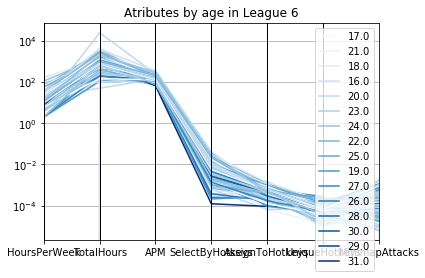

In [35]:
#Create a dataset for every level 
mask_6 = (dataset['LeagueIndex'] >= 6) & (dataset['LeagueIndex'] <= 7)
Level_6 = dataset.loc[mask_6]
L6 = Level_6[['Age', 'HoursPerWeek', \
              'TotalHours', 'APM', 'SelectByHotkeys', 'AssignToHotkeys', \
              'UniqueHotkeys', 'MinimapAttacks']]
L6.head()
from pandas.plotting import parallel_coordinates
parallel_coordinates(L6, 'Age', colormap="Blues")
plt.title("Atributes by age in League 6")
plt.yscale('log')